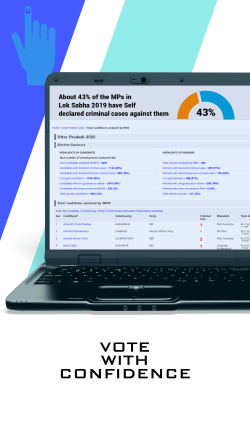



# Project : Exploratory Data Analysis on Election Candidate Dataset.

**Dataset**: 2019 Elections



---



Code:

## <center>Importing Dataset form Kaggle<center>



In [ ]:
!pip install jovian opendatasets --upgrade --quiet

     |████████████████████████████████| 68 kB 3.7 MB/s 


In [ ]:
dataset_url = 'https://www.kaggle.com/prakrutchauhan/indian-candidates-for-general-election-2019' 

In [ ]:

import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sahil422
Your Kaggle Key: ··········


100%|██████████| 133k/133k [00:00<00:00, 15.0MB/s]

In [ ]:
data_dir = './indian-candidates-for-general-election-2019'

In [ ]:
import os
os.listdir(data_dir)

['LS_2.0.csv']

In [ ]:
!pip install jovian --upgrade -q

### Importing Pandas

In [ ]:
import pandas as pd

In [ ]:
raw_election_data = pd.read_csv('./indian-candidates-for-general-election-2019/LS_2.0.csv')

## <center> Showing Raw Dataset </center>

In [ ]:
raw_election_data

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL\nCASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,"Rs 30,99,414\n ~ 30 Lacs+","Rs 2,31,450\n ~ 2 Lacs+",376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,"Rs 1,84,77,888\n ~ 1 Crore+","Rs 8,47,000\n ~ 8 Lacs+",318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,"Rs 3,64,91,000\n ~ 3 Crore+","Rs 1,53,00,000\n ~ 1 Crore+",314057,181,314238,21.092771,29.534285,1489790
3,Telangana,ADILABAD,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13030,6,13036,0.875023,1.225214,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,"Rs 7,42,74,036\n ~ 7 Crore+","Rs 86,06,522\n ~ 86 Lacs+",644459,2416,646875,33.383823,56.464615,1937690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2258,Maharashtra,YAVATMAL-WASHIM,Anil Jayram Rathod,0,IND,SHIP,MALE,0,43.0,GENERAL,Post Graduate,"Rs 48,90,000\n ~ 48 Lacs+","Rs 10,20,000\n ~ 10 Lacs+",14661,25,14686,0.766419,1.250060,1916185
2259,Telangana,ZAHIRABAD,B.B.PATIL,1,TRS,Car,MALE,18,63.0,GENERAL,Graduate,"Rs 1,28,78,51,556\n ~ 128 Crore+","Rs 1,15,35,000\n ~ 1 Crore+",434066,178,434244,28.975369,41.574183,1498666
2260,Telangana,ZAHIRABAD,MADAN MOHAN RAO,0,INC,Hand,MALE,0,49.0,GENERAL,Post Graduate,"Rs 90,36,63,001\n ~ 90 Crore+",Rs 0\n ~,427900,115,428015,28.559732,40.977823,1498666
2261,Telangana,ZAHIRABAD,BANALA LAXMA REDDY,0,BJP,Lotus,MALE,3,47.0,GENERAL,12th Pass,"Rs 5,85,77,327\n ~ 5 Crore+","Rs 52,50,000\n ~ 52 Lacs+",138731,216,138947,9.271379,13.302678,1498666


## <center> Cleaning Dataset </center>

In [ ]:
def convert(x):
    '''
    Extract the numeric value from the passed string and return it as float
    '''
    if str(x)[0] == 'R':
#         this is to ensure only valid values (and not NaN values) are converted
        return float(str(x).split()[1].replace(",", ""))
    return 0.0 
# default 0

In [ ]:
raw_election_data.ASSETS = raw_election_data.ASSETS.apply(convert)
raw_election_data.LIABILITIES = raw_election_data.LIABILITIES.apply(convert)
# convert the ASSETS and LIABILITIES to numeric data


In [ ]:
raw_election_data.sample(5)
# check if the applied operations were successful

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL\nCASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS
105,Andaman & Nicobar Islands,ANDAMAN & NICOBAR ISLANDS,KULDEEP RAI SHARMA,1,INC,Hand,MALE,0,52.0,GENERAL,Graduate Professional,132233012.0,80450870.0,95249,59,95308,29.926744,45.954156,318471
822,Punjab,GURDASPUR,SUNNY DEOL,1,BJP,Lotus,MALE,0,59.0,GENERAL,Others,871925679.0,534644785.0,551177,7542,558719,35.023168,50.583588,1595284
157,West Bengal,ASANSOL,BABUL SUPRIYO,1,BJP,Lotus,MALE,4,48.0,GENERAL,Graduate,59234826.0,5722184.0,632727,651,633378,39.197458,51.155150,1615865
12,Gujarat,AHMEDABAD WEST,DR. KIRIT P. SOLANKI,1,BJP,Lotus,MALE,0,69.0,SC,Post Graduate,89474039.0,0.0,638241,3381,641622,39.044323,64.211450,1643317
524,Madhya Pradesh,CHHINDWARA,GYANESHWAR GAJBHIYE,0,BSP,Elephant,MALE,0,45.0,SC,10th Pass,3361876.0,0.0,14262,13,14275,0.942379,1.143392,1514783


In [ ]:
raw_election_data.at[raw_election_data.EDUCATION == "Post Graduate\n", "EDUCATION"] =  "Post Graduate"
raw_election_data.at[raw_election_data.EDUCATION == "Graduate Professional", "EDUCATION"] =  "Graduate\nProfessional"

In [ ]:
raw_election_data.at[192, "WINNER"] = 1
raw_election_data.at[702, "WINNER"] = 1
raw_election_data.at[951, "WINNER"] = 1
raw_election_data.at[1132, "WINNER"] = 1
raw_election_data.at[172, "WINNER"] = 0

In [ ]:
raw_election_data.columns

Index(['STATE', 'CONSTITUENCY', 'NAME', 'WINNER', 'PARTY', 'SYMBOL', 'GENDER',
       'CRIMINAL\nCASES', 'AGE', 'CATEGORY', 'EDUCATION', 'ASSETS',
       'LIABILITIES', 'GENERAL\nVOTES', 'POSTAL\nVOTES', 'TOTAL\nVOTES',
       'OVER TOTAL ELECTORS \nIN CONSTITUENCY',
       'OVER TOTAL VOTES POLLED \nIN CONSTITUENCY', 'TOTAL ELECTORS'],
      dtype='object')

In [ ]:
candidates_df = raw_election_data.drop(['SYMBOL', 'GENERAL\nVOTES', 'POSTAL\nVOTES',
                        'OVER TOTAL ELECTORS \nIN CONSTITUENCY', 'OVER TOTAL VOTES POLLED \nIN CONSTITUENCY'], axis=1)
# take out the unnecessary columns

In [ ]:
candidates_df.rename(columns = {"CRIMINAL\nCASES": "CRIMINAL CASES", "TOTAL\nVOTES": "TOTAL VOTES"}, inplace = True)
candidates_df.sort_values(["STATE", "CONSTITUENCY"], inplace = True)

# rename some of the columns and sort the data with respect to State and Constituency columns

In [ ]:
candidates_df.info()

# Show Data Type

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2263 entries, 105 to 2171
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   STATE           2263 non-null   object 
 1   CONSTITUENCY    2263 non-null   object 
 2   NAME            2263 non-null   object 
 3   WINNER          2263 non-null   int64  
 4   PARTY           2263 non-null   object 
 5   GENDER          2018 non-null   object 
 6   CRIMINAL CASES  2018 non-null   object 
 7   AGE             2018 non-null   float64
 8   CATEGORY        2018 non-null   object 
 9   EDUCATION       2018 non-null   object 
 10  ASSETS          2263 non-null   float64
 11  LIABILITIES     2263 non-null   float64
 12  TOTAL VOTES     2263 non-null   int64  
 13  TOTAL ELECTORS  2263 non-null   int64  
dtypes: float64(3), int64(3), object(8)
memory usage: 265.2+ KB


Removing Nota cell

In [ ]:
candidates_df["CRIMINAL CASES"] = pd.to_numeric(candidates_df["CRIMINAL CASES"], errors = 'coerce').convert_dtypes()

In [ ]:
candidates_personal_df = candidates_df[candidates_df.NAME != "NOTA"]

In [ ]:
candidates_personal_df = candidates_personal_df.drop(["TOTAL VOTES", "TOTAL ELECTORS"], axis = 1)

# Removing Total Votes and Total Electors Column

**Cleaned Dataset**

In [ ]:
candidates_personal_df

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,GENDER,CRIMINAL CASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES
105,Andaman & Nicobar Islands,ANDAMAN & NICOBAR ISLANDS,KULDEEP RAI SHARMA,1,INC,MALE,0,52.0,GENERAL,Graduate\nProfessional,132233012.0,80450870.0
106,Andaman & Nicobar Islands,ANDAMAN & NICOBAR ISLANDS,VISHAL JOLLY,0,BJP,MALE,1,46.0,GENERAL,Graduate\nProfessional,85140573.0,4633914.0
107,Andaman & Nicobar Islands,ANDAMAN & NICOBAR ISLANDS,PARITOSH KUMAR HALDAR,0,IND,MALE,0,61.0,GENERAL,Post Graduate,19916000.0,1311000.0
108,Andaman & Nicobar Islands,ANDAMAN & NICOBAR ISLANDS,SANJAY MESHACK,0,AAP,MALE,0,49.0,GENERAL,12th Pass,99887782.0,1791076.0
109,Andaman & Nicobar Islands,ANDAMAN & NICOBAR ISLANDS,PRAKASH MINJ,0,BSP,MALE,0,43.0,SC,Post Graduate,1250000.0,240000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2042,West Bengal,TAMLUK,Lakshman Chandra Seth,0,INC,MALE,5,73.0,SC,Doctorate,2045953.0,0.0
2168,West Bengal,ULUBERIA,SAJDA AHMED,1,AITC,FEMALE,0,57.0,GENERAL,Graduate,28351569.0,5322615.0
2169,West Bengal,ULUBERIA,JOY BANERJEE,0,BJP,MALE,2,56.0,GENERAL,Graduate,246933.0,0.0
2170,West Bengal,ULUBERIA,MAKSUDA KHATUN,0,CPI(M),FEMALE,0,58.0,GENERAL,Doctorate,12578736.0,2876353.0


In [ ]:
candidates_personal_df.describe()
# works on only numeric data

,WINNER,CRIMINAL CASES,AGE,ASSETS,LIABILITIES
count,2018.000000,1996.000000,2018.000000,2.018000e+03,2.018000e+03
mean,0.268583,1.469940,52.273538,1.315849e+08,1.973860e+07
std,0.443332,7.677432,11.869373,4.122697e+08,8.945292e+07
min,0.000000,0.000000,25.000000,0.000000e+00,0.000000e+00
25%,0.000000,0.000000,43.250000,6.272526e+06,0.000000e+00
50%,0.000000,0.000000,52.000000,2.404181e+07,9.039245e+05
75%,1.000000,1.000000,61.000000,9.152498e+07,6.097971e+06
max,1.000000,240.000000,86.000000,8.950179e+09,1.547511e+09


In [ ]:
winners_df = candidates_df[candidates_df.WINNER == 1].sort_values(["STATE", "CONSTITUENCY"]).reset_index()
# extract the list of winners

In [ ]:
winners_df.drop(["index", "WINNER"], axis = 1, inplace = True)

Winner_df is cleaned version of the dataset.

In [ ]:
winners_df

,STATE,CONSTITUENCY,NAME,PARTY,GENDER,CRIMINAL CASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,TOTAL VOTES,TOTAL ELECTORS
0,Andaman & Nicobar Islands,ANDAMAN & NICOBAR ISLANDS,KULDEEP RAI SHARMA,INC,MALE,0,52.0,GENERAL,Graduate\nProfessional,132233012.0,80450870.0,95308,318471
1,Andhra Pradesh,AMALAPURAM,CHINTA ANURADHA,YSRCP,FEMALE,0,46.0,SC,Graduate,85993362.0,2431407.0,485958,1459556
2,Andhra Pradesh,ANAKAPALLI,Dr.Beesetti Venkata Satyavathi,YSRCP,FEMALE,0,52.0,GENERAL,Graduate\nProfessional,91526244.0,11139279.0,586226,1521363
3,Andhra Pradesh,ANANTAPUR,TALARI RANGAIAH,YSRCP,MALE,2,48.0,GENERAL,Doctorate,11773091.0,1135547.0,695208,1664160
4,Andhra Pradesh,ARUKU,GODDETI. MADHAVI,YSRCP,FEMALE,0,26.0,ST,Graduate\nProfessional,141179.0,0.0,562190,1451418
...,...,...,...,...,...,...,...,...,...,...,...,...,...
537,West Bengal,RAIGANJ,DEBASREE CHAUDHURI,BJP,FEMALE,2,48.0,GENERAL,Post Graduate,6139123.0,823416.0,511652,1601220
538,West Bengal,RANAGHAT,JAGANNATH SARKAR,BJP,MALE,1,56.0,SC,Graduate\nProfessional,17622476.0,0.0,783253,1762252
539,West Bengal,SRERAMPUR,KALYAN BANERJEE,AITC,MALE,0,62.0,GENERAL,Graduate\nProfessional,175968902.0,5522403.0,637707,1785472
540,West Bengal,TAMLUK,Adhikari Dibyendu,AITC,MALE,1,42.0,GENERAL,Graduate,37687867.0,8397501.0,724433,1694646


## Few info about dataset

In [ ]:
print("Number of Parties which fielded at least 1 candidate: ", candidates_df.PARTY.unique().shape[0]-2)
                                                                 # -2 : 1 for independent candidates and 1 for NOTA

Number of Parties which fielded at least 1 candidate:  131


In [ ]:
print("Number of Independent Candidates who contested the elections: ", candidates_df[candidates_df.PARTY == 'IND'].shape[0])

Number of Independent Candidates who contested the elections:  201


In [ ]:
print("Number of Parties which won at least 1 seat: ", winners_df.PARTY.unique().shape[0] - 1)
                                                                # -1 : for independent winners

Number of Parties which won at least 1 seat:  35


In [ ]:
print("Number of Independent Winners: ", winners_df[winners_df.PARTY == 'IND'].shape[0])

Number of Independent Winners:  4


**Import Seaborn and matplotlib to plot graph and charts**

In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (15, 10)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
import numpy as np

In [ ]:
all_party_seats = winners_df.PARTY.value_counts().sort_values(ascending = False)


In [ ]:
all_party_seats

BJP       303
INC        52
DMK        23
YSRCP      22
AITC       22
SHS        18
JD(U)      16
BJD        12
BSP        10
TRS         9
LJP         6
NCP         5
SP          5
CPI(M)      5
IND         4
IUML        3
JKN         3
TDP         3
SAD         2
AIMIM       2
ADAL        2
SKM         1
AJSUP       1
JMM         1
AIADMK      1
VCK         1
AAP         1
RLTP        1
KEC(M)      1
JD(S)       1
NDPP        1
MNF         1
RSP         1
NPF         1
AIUDF       1
NPEP        1
Name: PARTY, dtype: int64

All parties seat distribution

In [ ]:
others = all_party_seats[all_party_seats<10].sum()
# simplifying the output for visualization purposes

In [ ]:
seat_distribution = all_party_seats[all_party_seats>=10].append(pd.Series({"Others":others}))

In [ ]:
seat_distribution

BJP       303
INC        52
DMK        23
YSRCP      22
AITC       22
SHS        18
JD(U)      16
BJD        12
BSP        10
Others     64
dtype: int64

All parties seat distribution (shortend)

## <center/> Exploratory Analysis and Visualization


### Average Seat Share

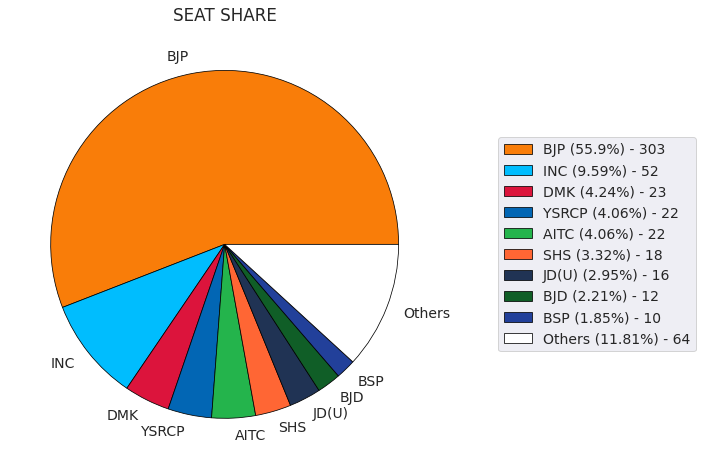

In [ ]:
plt.figure(figsize = (10,8))
plt.title("SEAT SHARE")
plt.pie(seat_distribution, labels = seat_distribution.index,
        colors = ['#f97d09', '#00bdfe', '#dc143c', '#0266b4', '#24b44c', '#ff6634', 
                                     '#203354', '#105e27', '#22409a', '#FFFFFF'],
        wedgeprops = {'edgecolor' : 'black', 'linewidth' : 0.75, 'antialiased' : True})
# pie chart created using the Data, labels, colors, and wedge border properties
# colors are customised according to each party's colors

seat_percent = round((seat_distribution/seat_distribution.sum())*100,2)
legend = seat_percent.index + " (" + seat_percent.values.astype(str) + "%) - " + seat_distribution.values.astype(str)
# legend

plt.legend(legend, loc = "right", bbox_to_anchor = (1.6,0.5));
# legend is placed outside the main chart

55% of nominee contested with seats from BJP
9.5% of seats contested from congress.

### Average Age of candadidate

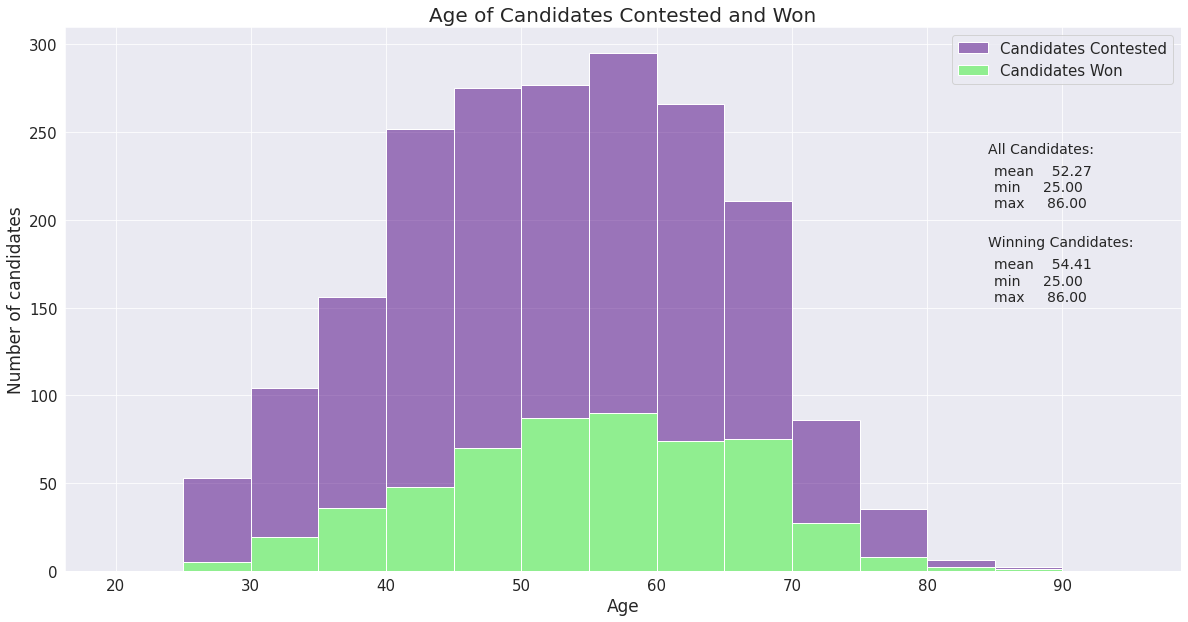

In [ ]:
plt.figure(figsize = (20,10))
plt.title("Age of Candidates Contested and Won", fontsize=20)
plt.xlabel("Age", fontsize=17)
plt.ylabel("Number of candidates", fontsize=17)
# put the basic labelling

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# axes ticks size

sns.histplot(data = candidates_personal_df, x = 'AGE', bins = np.arange(20,100,5), color = 'indigo', alpha = 0.5)
sns.histplot(data = winners_df, x = 'AGE', bins = np.arange(20,100,5), color = 'lightgreen', alpha = 1)
# two histograms plotted, Won over Contested to show the relative percentage

plt.legend(["Candidates Contested", "Candidates Won"], fontsize = 15)
# legend to the plot

plt.text(84.5, 238, "All Candidates:")
plt.figtext(0.77, 0.63, round(candidates_personal_df.describe().AGE[['mean', 'min', 'max']], 2).to_string())

plt.text(84.5,185, "Winning Candidates:")
plt.figtext(0.77, 0.5, round(winners_df.describe().AGE[['mean', 'min', 'max']], 2).to_string());
# basic stats printed



As we can see from the Nested Histogram, the age group 55-60 has the maximum number of Candidates, and Winners, followed closely by the age group 50-55.

The average age of the house - 54 years also lies in this range. 


A majority of the winners are between the ages 45-70, which can be considered as the normal peak years of a Politician.



### Youngest Member of candidate

In [ ]:
print("Youngest Member of the House:")
winners_df[(winners_df.AGE == 25)][["NAME", "PARTY", "STATE", "CONSTITUENCY"]].reset_index(drop = True)

Youngest Member of the House:


,NAME,PARTY,STATE,CONSTITUENCY
0,Chandrani Murmu,BJD,Odisha,KEONJHAR


**As seen About its Chandrani Murmu**

### Oldest Member of Party

In [ ]:
print("Oldest Member of the House:")
winners_df[(winners_df.AGE == 86)][["NAME", "PARTY", "STATE", "CONSTITUENCY"]].reset_index(drop = True)

Oldest Member of the House:


,NAME,PARTY,STATE,CONSTITUENCY
0,DR. SHAFIQUR REHMAN BARQ,SP,Uttar Pradesh,SAMBHAL


**As seen About its DR. SHAFIQUR REHMAN BARQ**

In [ ]:
seat_category = winners_df.CATEGORY.value_counts()
# winners_df has 1 constituency only 1 time, so analysing its CATEGORY column will give the correct result

### Total Seats Availale in each Category (SC , ST , General)

In [ ]:
pd.DataFrame(seat_category)

,CATEGORY
GENERAL,400
SC,86
ST,56


### Distribution of Seats by Category

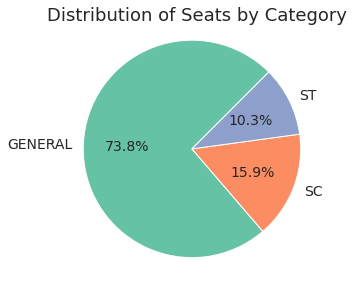

In [ ]:
sns.set_palette(sns.color_palette('Set2'))
plt.figure(figsize=(8,5))
plt.title("Distribution of Seats by Category", size=18, x = 0.52, y =0.95)

plt.pie(seat_category, labels = seat_category.index, autopct = '%1.1f%%', startangle = 45);
# percentage of seats shown on the plot

### Gender Distribution

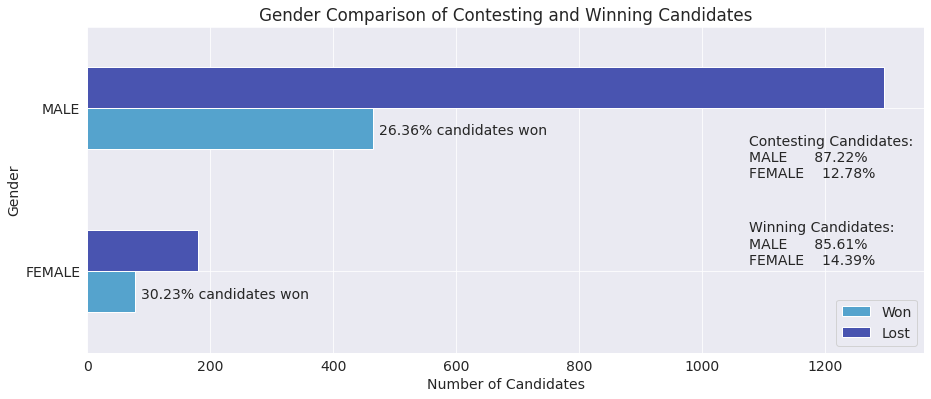

In [ ]:
gender_group = candidates_personal_df.groupby(["GENDER", "WINNER"]).size()
gender_group = gender_group.unstack()
gender_group = gender_group[[1,0]]
# a2a from stack overflow

# gender with winning condition is extracted as a dataframe

sns.set_palette(sns.color_palette("icefire"))
# color palette set
gender_group.plot(kind = 'barh', figsize = (15,6), title = "Gender Comparison of Contesting and Winning Candidates")
# horizontal bar plot created with Pandas 

plt.legend(["Won", "Lost"])
plt.xlabel("Number of Candidates")
plt.ylabel("Gender")
# legend and labels set

plt.figtext(0.738,0.53, "Contesting Candidates:\n" + 
            round((candidates_personal_df.GENDER.value_counts(normalize=True)*100),2).to_string().replace("\n", "%\n")+"%")

plt.figtext(0.738,0.33, "Winning Candidates:\n" + 
            round((winners_df.GENDER.value_counts(normalize=True)*100),2).to_string().replace("\n", "%\n")+"%")

# Total candidates statistics (percentages) printed on the chart, with some applied String formatting to give the look

win_percent = round((winners_df.GENDER.value_counts()/candidates_personal_df.GENDER.value_counts())*100,2)
plt.figtext(0.395, 0.63, str(round(win_percent.MALE,2)) + "% candidates won")
plt.figtext(0.175, 0.25, str(round(win_percent.FEMALE,2))+ "% candidates won");
# percentage of winning, gender-wise printed on the chart

In [ ]:
print("No. of male MPs: ", winners_df.GENDER.value_counts()["MALE"])
print("No. of female MPs: ", winners_df.GENDER.value_counts()["FEMALE"])

No. of male MPs:  464
No. of female MPs:  78


In [ ]:
winners_df["EDUCATION"].unique()

array(['Graduate\nProfessional', 'Graduate', 'Doctorate', '8th Pass',
       'Post Graduate', '12th Pass', '10th Pass', 'Others', '5th Pass',
       'Illiterate', 'Literate'], dtype=object)

In [ ]:
education = winners_df.EDUCATION.value_counts()
education = education.reindex(["Illiterate", "Literate", "5th Pass", "8th Pass", "10th Pass", "12th Pass", "Graduate", 
                               "Graduate\nProfessional","Post Graduate", "Doctorate", "Others"])
# arrange the Series in a systematic order

In [ ]:
education

Illiterate                  1
Literate                    1
5th Pass                    4
8th Pass                   12
10th Pass                  45
12th Pass                  69
Graduate                  133
Graduate\nProfessional    101
Post Graduate             135
Doctorate                  24
Others                     17
Name: EDUCATION, dtype: int64

### Average Qualification

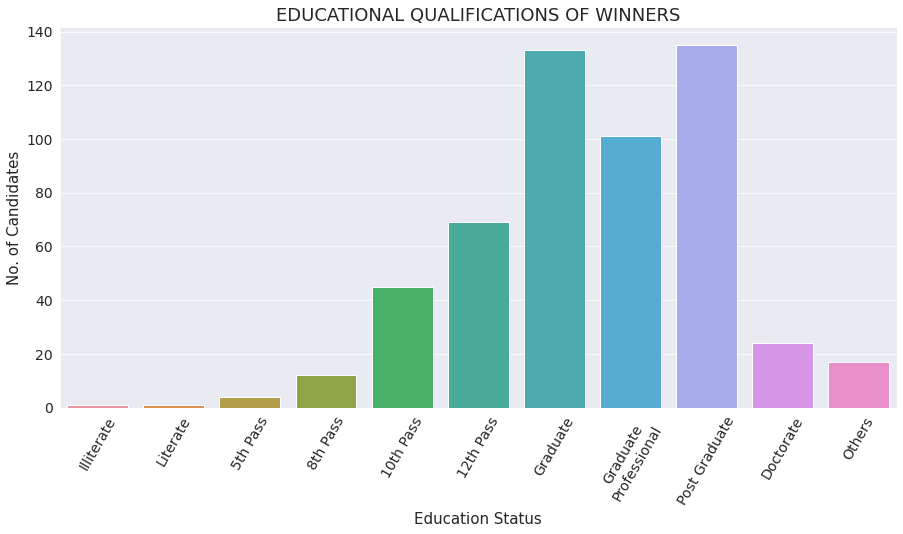

In [ ]:
plt.figure(figsize=(15,7))
plt.xticks(rotation = 60);
# plot detailing

plt.xlabel("Education Status", fontsize = 15)
plt.ylabel("No. of Candidates", fontsize = 15)
plt.title("EDUCATIONAL QUALIFICATIONS OF WINNERS",fontsize = 18)
# labels and title

sns.barplot(x = education.index, y = education.values);
# plotting the barplot

## <center> Asking And Answering Questions. </center>

<center> Now we shall pose some general Election related questions, and find the answers to those using Data Analysis, and Visualize them wherever possible. </center>



##  Voter Turnout

In [ ]:
total_voters = candidates_df.groupby(["STATE", "CONSTITUENCY"])[["TOTAL VOTES"]].sum()
total_electors = winners_df.groupby(["STATE", "CONSTITUENCY"])[["TOTAL ELECTORS"]].sum()
votes_df = total_voters.join(total_electors)
votes_df["VOTER TURNOUT"] = round(votes_df["TOTAL VOTES"]/votes_df["TOTAL ELECTORS"]*100,2)

In [ ]:
votes_df = votes_df.rename(index = {"Andaman & Nicobar Islands": "Andaman &\nNicobar Islands"})
# this is done purely for visualization purposes
const_turnout = votes_df.sort_values(by = ["VOTER TURNOUT"], ascending = False)
# Voter Turnout of all constituencies

high_consts = const_turnout.head(10)
low_consts = const_turnout.tail(10)
# getting the highest and the lowest Voter Outcome Constituencies

In [ ]:

xh = high_consts.index.get_level_values(1) + "\n(" + high_consts.index.get_level_values(0) + ")"
xl = low_consts.index.get_level_values(1) + "\n(" + low_consts.index.get_level_values(0) + ")"


We now have the required answer for Constituencies.
Now we analyse the data to answer the first part of the question, i.e., Which States/UTs had the highest and the lowest Voter Turnout?

In [ ]:
# getting the state-wise data
states_df = votes_df.groupby("STATE").sum().drop(["VOTER TURNOUT"], axis = 1)
states_df["VOTER TURNOUT"] = round(states_df["TOTAL VOTES"]/states_df["TOTAL ELECTORS"]*100,2)
# necessary arithmetic to calculate the required Voter Turnout of all States

In [ ]:
states_turnout = states_df.sort_values(by = "VOTER TURNOUT", ascending = False)
high_stat = states_turnout.head(10)
low_stat = states_turnout.tail(10)
# getting the highest and lowest Voter Outcome States

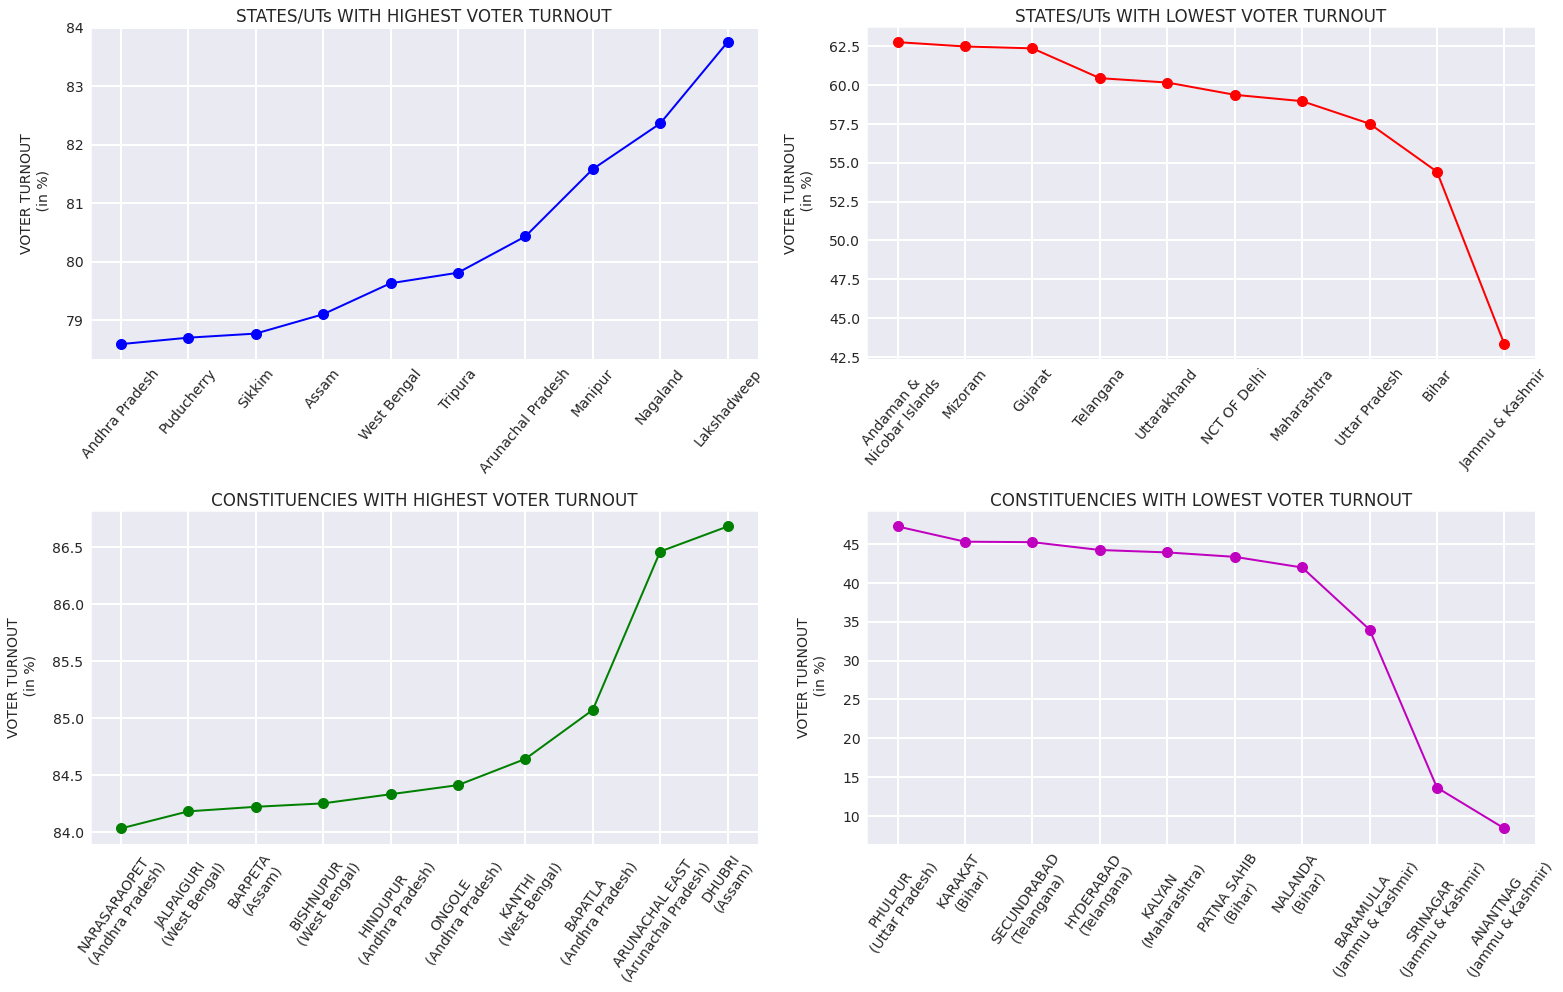

In [ ]:
fig, axes = plt.subplots(2,2, figsize = (22,14))
# plot will be a subplot of 4 plots
# First row will be of States, second row of Constituencies

# Highest State Voter Outcome Plot
axes[0][0].tick_params(axis = 'x', labelrotation = 50)
axes[0][0].plot(high_stat.index[::-1], high_stat["VOTER TURNOUT"][::-1], 'b-o', linewidth = 2,
         markersize = 10)
axes[0][0].set_ylabel("VOTER TURNOUT\n (in %)", labelpad = 15)
axes[0][0].set_title("STATES/UTs WITH HIGHEST VOTER TURNOUT")
axes[0][0].grid(linewidth = 2)
# putting the necessary detailing and plotting, [::-1] is used to reverse the order and get an increasing graph

# Lowest State Voter Outcome Plot
axes[0][1].tick_params(axis = 'x', labelrotation = 50)
axes[0][1].plot(low_stat.index, low_stat["VOTER TURNOUT"], 'r-o', linewidth = 2,
         markersize = 10)
axes[0][1].set_ylabel("VOTER TURNOUT\n (in %)", labelpad = 15)
axes[0][1].set_title("STATES/UTs WITH LOWEST VOTER TURNOUT")
axes[0][1].grid(linewidth = 2)
# putting the necessary detailing and plotting

# Now the Constituencies

# Highest Consituency Voter Outcome Plot
axes[1][0].tick_params(axis = 'x', labelrotation = 55)
axes[1][0].plot(xh[::-1], high_consts["VOTER TURNOUT"][::-1], 'g-o', linewidth = 2,
         markersize = 10)
axes[1][0].set_ylabel("VOTER TURNOUT\n (in %)", labelpad = 15)
axes[1][0].set_title("CONSTITUENCIES WITH HIGHEST VOTER TURNOUT")
axes[1][0].grid(linewidth = 2)
# putting the necessary detailing and plotting, [::-1] is used to reverse the order and get an increasing graph

# Lowest Constituency Voter Outcome Plot
axes[1][1].tick_params(axis = 'x', labelrotation = 55)
axes[1][1].plot(xl, low_consts["VOTER TURNOUT"], 'm-o', linewidth = 2,
         markersize = 10)
axes[1][1].set_ylabel("VOTER TURNOUT\n (in %)", labelpad = 15)
axes[1][1].set_title("CONSTITUENCIES WITH LOWEST VOTER TURNOUT")
axes[1][1].grid(linewidth = 2)
# putting the necessary detailing and plotting

fig.tight_layout();
# to prevent overlapping of plots

Voter Turnout help ECI to make decision on advertiment based on lower turnout.
If a State/UT has lower turnout there we have to have more representative or ECI  have to increase advertiment. 

* Andra Pradesh has lowest voter turnout
* Lakshadeep has the higghest voter turnout
* In UT: Andaman/nicobar has highest turnout
* Jammu & Kashmir has lowest turnout.






In [ ]:
nat_average = round(states_turnout.sum()["TOTAL VOTES"]/states_turnout.sum()["TOTAL ELECTORS"]*100,2)
print("National Voter Turnout: ", nat_average, "%", sep="")

National Voter Turnout: 65.26%


65.26% of population voted in year 2019

### Q2: How many elected MPs have a criminal record and what is their party-wise distribution?

We create a new Pandas Series crime from the winners_df DataFrame containing party-wise distribution of number of MPs having at least 1 criminal case against them.

In [ ]:
crime = winners_df[winners_df["CRIMINAL CASES"] != 0]['PARTY'].value_counts()
# criminal record of each party

In [ ]:
crime
# party-wise distribution

BJP       117
INC        30
JD(U)      13
SHS        11
YSRCP      10
DMK        10
AITC        9
LJP         6
BSP         5
TRS         3
AIMIM       2
SP          2
IND         2
IUML        2
NCP         2
CPI(M)      2
TDP         1
JKN         1
SAD         1
AIUDF       1
VCK         1
RSP         1
AJSUP       1
ADAL        1
BJD         1
Name: PARTY, dtype: int64

BJP was winner in 2019 election. Here We can see that 117 part members who won in election had IPC charges filed on them. 30 for Indian Nation Congress

In [ ]:
# shortening the Series for better visualization

crime = crime[:9].append(pd.Series([crime[9:].sum()]))
# taking total 10 elements in the series
crime.rename(index = {0 : "Others"}, inplace = True)

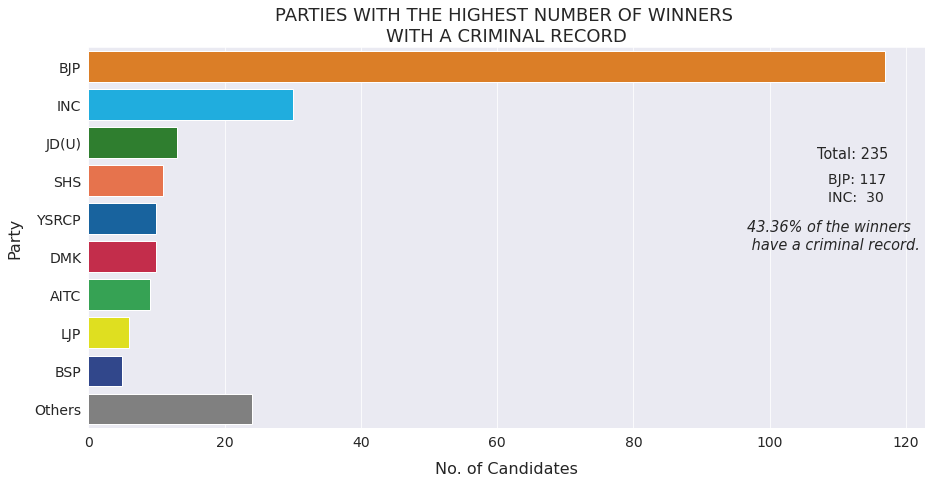

In [ ]:
plt.figure(figsize = (15,7))

palette = ['#f97d09', '#00bdfe', '#228b22', '#ff6634', '#0266b4', '#dc143c', '#24b44c', 
                                      'yellow', '#22409a', 'grey']
# color palette is customized to correspond to each party's colors
sns.barplot(x = crime.values, y = crime.index, palette = sns.set_palette(palette, 10))
# the data is plotted as a horizontal bar plot

plt.title("PARTIES WITH THE HIGHEST NUMBER OF WINNERS \nWITH A CRIMINAL RECORD", fontsize = 18)
plt.ylabel("Party", fontsize = 16, labelpad = 12)
plt.xlabel("No. of Candidates", fontsize = 16, labelpad = 12)
plt.tick_params(labelsize = 14) # increase label size 
# plot detailing

plt.figtext(0.8, 0.66, "Total: " + str(crime.sum()), fontsize = 14.5)
plt.figtext(0.81, 0.61, "BJP: " + str(crime["BJP"]), fontsize = 14)
plt.figtext(0.81, 0.575, "INC:  " + str(crime["INC"]), fontsize = 14)
plt.figtext(0.735, 0.48, str(round(crime.sum()/winners_df.shape[0]*100,2))+ "% of the winners\n have a criminal record.", 
            fontsize = 14.5, style = 'oblique');
# printing details on the graph

Same Data in Form of graph. Out of total 235 winning members of all part.  117 of BJP has Criminal Records. And on 30 members for Congress.


43.36% of winning member has criminal charges in parts.

(This is self atested data. Sources are candidate themselves.)

In [ ]:
# Some other stats

print(round(crime["BJP"]/seat_distribution["BJP"]*100, 2), "% BJP MPs have a criminal record.", sep = "")
print(round(crime["INC"]/seat_distribution["INC"]*100, 2), "% INC MPs have a criminal record.", sep = "")
print("Both the parties combined gave ", round(crime[["BJP", "INC"]].sum()/crime.sum()*100, 2), "% of the criminals to the House.", 
      sep = "")

38.61% BJP MPs have a criminal record.
57.69% INC MPs have a criminal record.
Both the parties combined gave 62.55% of the criminals to the House.


For All nominee:
38% of BJP MPS have criminal record.
57% of Congrss has criminal record.
62% of All nominee has has criminal records.

## Assests 

In [ ]:
winners_df.insert(11, "NET WORTH", winners_df["ASSETS"] - winners_df["LIABILITIES"])

In [ ]:
intervals = [5e6, 1e7, 5e7, 10e7, 25e7, 50e7, 100e7]
assets = winners_df["ASSETS"].sort_values()
liabilities = winners_df["LIABILITIES"].sort_values()
net_worth = winners_df["NET WORTH"].sort_values()

In [ ]:
# helper function
def segregate(intervals, ownings):
    '''
    Function to return a list containing number of winners in each interval.

    intervals - list containing money intervals
    ownings - DataFrame containing data which is to be segregated into groups
    '''
    l = []
    l.append(ownings[ownings<=intervals[0]].count())
    for i in range(len(intervals)-1):
        l.append(ownings[(ownings > intervals[i]) & (ownings <= intervals[i+1])].count())
    l.append(ownings[ownings>intervals[i+1]].count())
    return l

In [ ]:
data = {"ASSETS" : segregate(intervals, assets),
        "LIABILITIES" : segregate(intervals, liabilities),
        "NET WORTH" : segregate(intervals, net_worth)}

worth_df = pd.DataFrame(data, index = ["<=50lac", ">50lac & <=1cr", ">1cr & <=5cr", ">5cr & <=10cr", ">10cr & <=25cr",
                           ">25cr & <=50cr", ">50cr & <=100cr", ">100cr"])

We create a new DataFrame worth_df to store the required distribution as needed.

In [ ]:
worth_df

,ASSETS,LIABILITIES,NET WORTH
<=50lac,36,340,44
>50lac & <=1cr,28,55,38
>1cr & <=5cr,212,91,208
>5cr & <=10cr,84,17,80
>10cr & <=25cr,90,22,89
>25cr & <=50cr,43,6,43
>50cr & <=100cr,23,7,19
>100cr,26,4,21


21 Members net worth is more that 100 Cr

In [ ]:
# Showing it horizontally

worth_df = worth_df.transpose()
# dataframe inverted for visualization purposes
worth_df.reset_index(inplace = True)
# index column added to the DataFrame

worth_df

,index,<=50lac,>50lac & <=1cr,>1cr & <=5cr,>5cr & <=10cr,>10cr & <=25cr,>25cr & <=50cr,>50cr & <=100cr,>100cr
0,ASSETS,36,28,212,84,90,43,23,26
1,LIABILITIES,340,55,91,17,22,6,7,4
2,NET WORTH,44,38,208,80,89,43,19,21


Plot the distribution as a Stacked Bar Chart, with each of ASSETS, LIABILITIES and NET WORTH as a vertical column and showing different money intervals with different colors

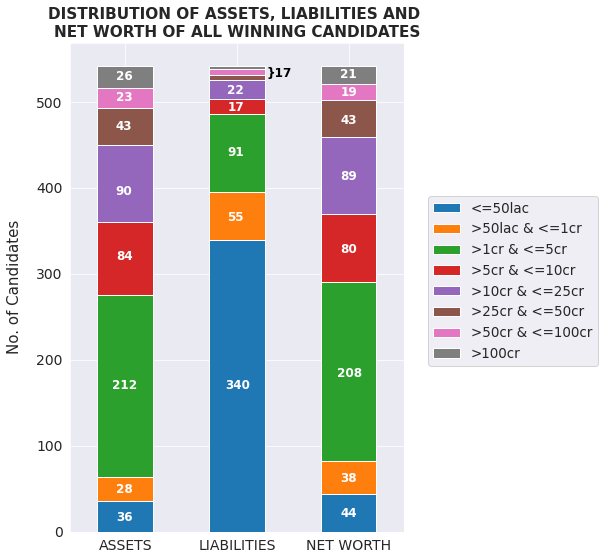

In [ ]:
sns.set_palette("tab10")
# set color sequence
worth_df.plot(x = "index", kind = 'bar', stacked = True, figsize = (6,9))
# plot a Stacked Bar chart

plt.xticks(rotation = 0)
plt.tick_params(labelsize = 14)
plt.xlabel(None)
plt.ylabel("No. of Candidates", fontsize = 15, labelpad = 14)
# plot detailing

plt.title("DISTRIBUTION OF ASSETS, LIABILITIES AND \nNET WORTH OF ALL WINNING CANDIDATES", fontsize = 15.25, 
           weight = 'bold')
plt.legend(fontsize = 13.5, bbox_to_anchor = [1.05,0.7]);
# title and legend placed at appropriate positions

# for the following process of writing data on the graph, I'm sure there must be some simpler annotation method, 
# but for now, I'm using the direct printing approach

# ASSETS
plt.figtext(0.232, 0.142, worth_df.loc[0]["<=50lac"], color = 'white', fontsize = 12, weight = "bold")
plt.figtext(0.232, 0.185, worth_df.loc[0][">50lac & <=1cr"], color = 'white', fontsize = 12, weight = "bold")
plt.figtext(0.223, 0.345, worth_df.loc[0][">1cr & <=5cr"], color = 'white', fontsize = 12, weight = "bold")
plt.figtext(0.232, 0.545, worth_df.loc[0][">5cr & <=10cr"], color = 'white', fontsize = 12, weight = "bold")
plt.figtext(0.232, 0.645, worth_df.loc[0][">10cr & <=25cr"], color = 'white', fontsize = 12, weight = "bold")
plt.figtext(0.232, 0.745, worth_df.loc[0][">25cr & <=50cr"], color = 'white', fontsize = 12, weight = "bold")
plt.figtext(0.232, 0.790, worth_df.loc[0][">50cr & <=100cr"], color = 'white', fontsize = 12, weight = "bold")
plt.figtext(0.232, 0.823, worth_df.loc[0][">100cr"], color = 'white', fontsize = 12, weight = "bold");

# LIABILITIES
plt.figtext(0.485, 0.345, worth_df.loc[1]["<=50lac"], color = 'white', fontsize = 12, weight = "bold")
plt.figtext(0.490, 0.605, worth_df.loc[1][">50lac & <=1cr"], color = 'white', fontsize = 12, weight = "bold")
plt.figtext(0.490, 0.705, worth_df.loc[1][">1cr & <=5cr"], color = 'white', fontsize = 12, weight = "bold")
plt.figtext(0.490, 0.775, worth_df.loc[1][">5cr & <=10cr"], color = 'white', fontsize = 12, weight = "bold")
plt.figtext(0.490, 0.800, worth_df.loc[1][">10cr & <=25cr"], color = 'white', fontsize = 12, weight = "bold")
plt.figtext(0.58, 0.827, "}" + str(worth_df.loc[1][">25cr & <=50cr"]+worth_df.loc[1][">50cr & <=100cr"]+worth_df.loc[1][">100cr"]),
            color = 'black', fontsize = 12, weight = "bold");

# NET WORTH
plt.figtext(0.752, 0.148, worth_df.loc[2]["<=50lac"], color = 'white', fontsize = 12, weight = "bold")
plt.figtext(0.752, 0.202, worth_df.loc[2][">50lac & <=1cr"], color = 'white', fontsize = 12, weight = "bold")
plt.figtext(0.743, 0.364, worth_df.loc[2][">1cr & <=5cr"], color = 'white', fontsize = 12, weight = "bold")
plt.figtext(0.752, 0.555, worth_df.loc[2][">5cr & <=10cr"], color = 'white', fontsize = 12, weight = "bold")
plt.figtext(0.752, 0.668, worth_df.loc[2][">10cr & <=25cr"], color = 'white', fontsize = 12, weight = "bold")
plt.figtext(0.752, 0.754, worth_df.loc[2][">25cr & <=50cr"], color = 'white', fontsize = 12, weight = "bold")
plt.figtext(0.752, 0.797, worth_df.loc[2][">50cr & <=100cr"], color = 'white', fontsize = 12, weight = "bold")
plt.figtext(0.752, 0.825, worth_df.loc[2][">100cr"], color = 'white', fontsize = 12, weight = "bold");

In [ ]:
print("Percentage of MPs with Assets >1cr = ",
      round((542-(worth_df.at[0, "<=50lac"] + worth_df.at[0, ">50lac & <=1cr"]))/542*100, 2), "%", sep = "")
print("Percentage of MPs with Net Worth >1cr = ",
      round((542-(worth_df.at[2, "<=50lac"] + worth_df.at[2, ">50lac & <=1cr"]))/542*100, 2), "%", sep = "")

Percentage of MPs with Assets >1cr = 88.19%
Percentage of MPs with Net Worth >1cr = 84.87%



Hence, 88% of MPs has Assets More than 1 Core
84% of MPs has net worth of 1 Core.

## <center> Inferences and Conclusion </center>

To sum up the entire analysis in 1 statement:

The incumbent BJP Government led by Prime Minister Narendra Modi secured an overwhelming victory over its opponents and secured a second term in the office, winning 303 seats out of 542.


* The average age of the House is 54 years with maximum MPs between the ages 45-70.
* Nearly 26% of the seats in the House are reserved for SC/ST candidates.
* More than 14% of the House consists of Women MPs.
* Female candidates had a much higher winning percentage (30.23%) as compared to Male candidates (26.36%).
* Less than 150 MPs are 12th Pass or below.
* The National average Voter Turnout was 65.26%.
* Many North Eastern states registered some of the highest voter turnouts in the country.
* Important states like Bihar, Uttar Pradesh, and Maharashtra had the lowest voter turnouts in the country.
* Lakshadweep had the best voter turnout of nearly 84%.
* Jammu and Kashmir had the worst voter turnout of about 42.6%.
* More than 43% of the elected MPs have a self-declared criminal record, with the BJP and the INC combined having more than 62% of those.
* An astonishing 88% of the elected MPs have Assets worth more than 1 crore while nearly 85% of the MPs have a Net Worth higher than 1 crore.


